# Exercise 11.2

The function to fit in this case is
$$
f(x)=4-3x-2x^2+3x^3
$$
with $x \in [-1,1]$. Therefore the target function is of the type
$$
f(x)=d+cx+bx^2+ax^3
$$

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

# target parameters of f(x)
d = 4  # intersect
c = -3 
b = -2
a = 3
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 16})

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a*x_valid**3+b*x_valid**2+c*x_valid+d # ideal (target) cubic function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a*x_train**3+b*x_train**2+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3+b*x_valid**2+c*x_valid+d, sigma)

2023-10-07 22:00:32.568121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 22:00:32.633842: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 22:00:32.655696: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-07 22:00:33.058348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

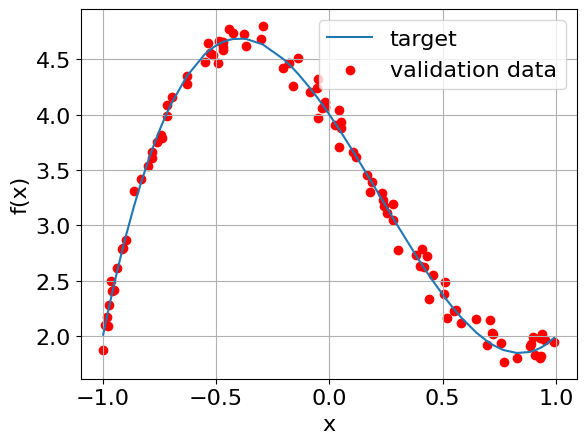

In [2]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [3]:
def modello(N_layers,N_neurons,activation_fun,optim,loss_fun):
    model = tf.keras.Sequential()
    for i in range(N_layers):
        model.add(Dense(N_neurons,activation_fun,input_shape=(1,)))
        model.add(Dense(N_neurons,activation_fun))
        model.add(Dense(N_neurons,activation_fun))
        model.add(Dense(N_neurons,activation_fun))
        model.add(Dense(N_neurons,activation_fun))
        model.add(Dense(N_neurons,activation_fun))
        model.add(Dense(N_neurons,activation_fun))
    model.add(Dense(1)) # deve essere dim 1 per forza
    
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer=optim, loss=loss_fun, metrics=[loss_fun])
    
    #training the model
    history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=0,
          validation_data=(x_valid, y_valid))
    
    return model

From previous trials the number of epochs has to be >=100. Now let's check how good is the fit with different validation functions.

2023-10-07 22:00:36.343928: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-07 22:00:36.343956: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-10-07 22:00:36.344813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 0s 1ms/step


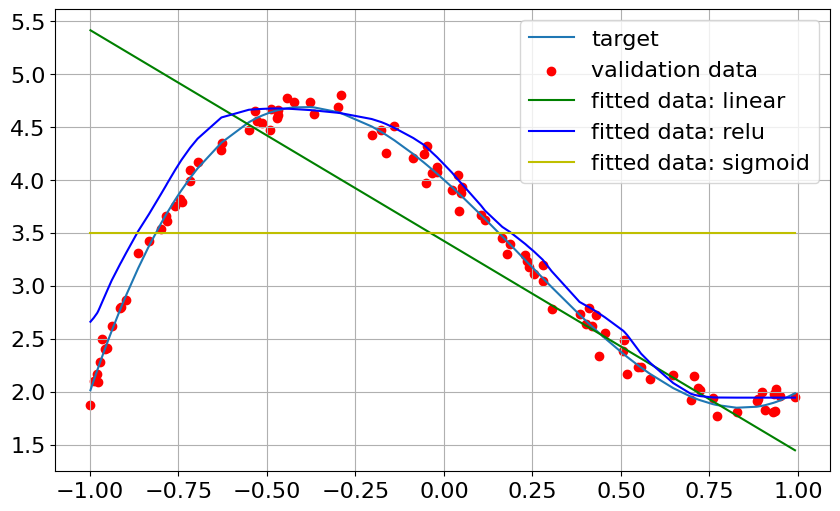

In [4]:
model0 = modello(3,128,'linear','sgd','mae')
model1 = modello(3,128,'relu','sgd','mae')# prima cambio le activation function
model2 = modello(3,128,'sigmoid','sgd','mae')

# plot validation and target dataset,and resuting fit
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.plot(x_valid,model0.predict(x_valid),color ='g',label = 'fitted data: linear')
plt.plot(x_valid,model1.predict(x_valid),color ='b',label = 'fitted data: relu')
plt.plot(x_valid,model2.predict(x_valid),color ='y',label = 'fitted data: sigmoid')
plt.legend()
plt.grid(True)
plt.show()

Now relu is used and different loss functions and optimizers.

4/4 [==============================] - 0s 1ms/step


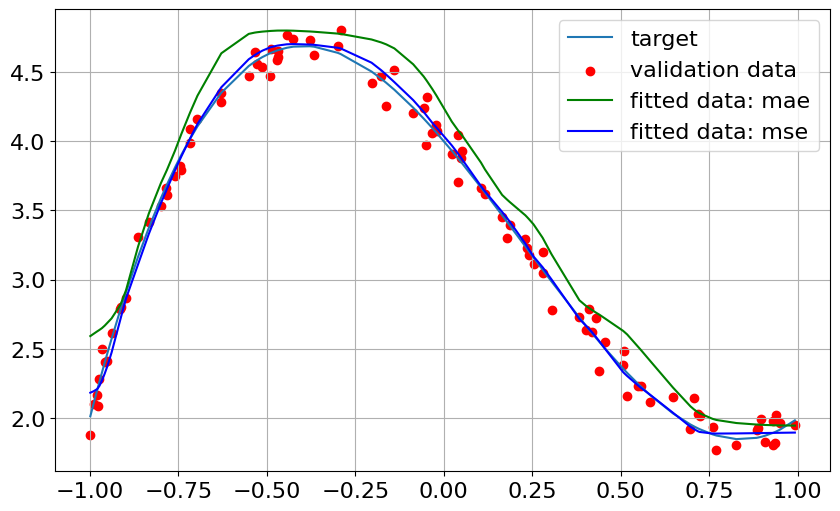

In [5]:
model3 = modello(3,128,'relu','sgd','mae')
model4 = modello(3,128,'relu','sgd','mse')

# plot validation and target dataset,and resuting fit
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.plot(x_valid,model3.predict(x_valid),color ='g',label = 'fitted data: mae')
plt.plot(x_valid,model4.predict(x_valid),color ='b',label = 'fitted data: mse')
plt.legend()
plt.grid(True)
plt.show()

Mse seems to be the best loss.

4/4 [==============================] - 0s 1ms/step


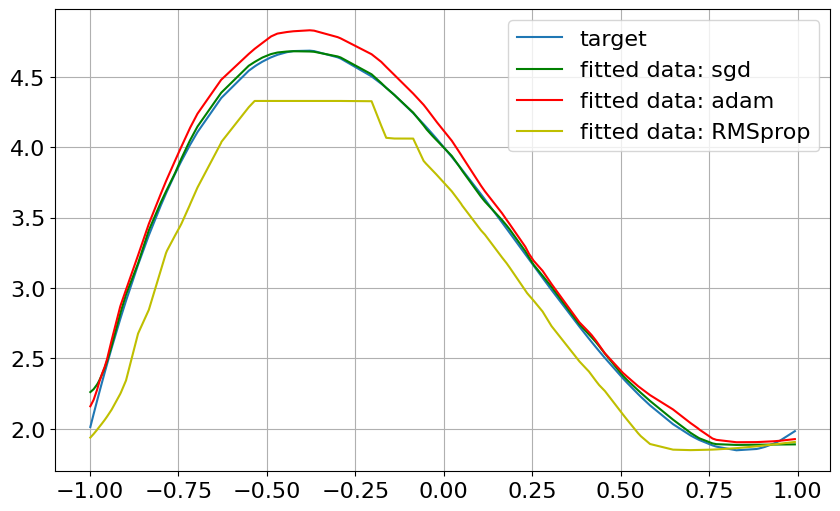

In [6]:
model5 = modello(3,128,'relu','sgd','mse')
model6 = modello(3,128,'relu','adam','mse')
model7 = modello(3,128,'relu','RMSprop','mse')

# plot validation and target dataset,and resuting fit
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label='target')
plt.plot(x_valid,model5.predict(x_valid),color ='g',label = 'fitted data: sgd')
plt.plot(x_valid,model6.predict(x_valid),color ='r',label = 'fitted data: adam')
plt.plot(x_valid,model7.predict(x_valid),color ='y',label = 'fitted data: RMSprop')

plt.legend()
plt.grid(True)
plt.show()

Graphically ADAM seems to be the best, now let's try different layers and neurons.

4/4 [==============================] - 0s 2ms/step


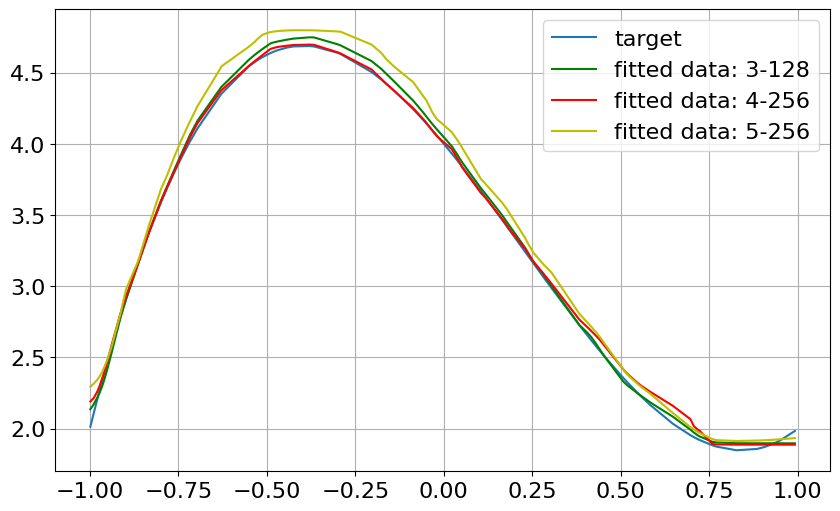

In [7]:
model8 = modello(3,128,'relu','adam','mse')
model9 = modello(4,256,'relu','adam','mse')
model10 = modello(5,256,'relu','adam','mse')

# plot validation and target dataset,and resuting fit
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label='target')
plt.plot(x_valid,model8.predict(x_valid),color ='g',label = 'fitted data: 3-128')
plt.plot(x_valid,model9.predict(x_valid),color ='r',label = 'fitted data: 4-256')
plt.plot(x_valid,model10.predict(x_valid),color ='y',label = 'fitted data: 5-256')

plt.legend()
plt.grid(True)
plt.show()

All the three models seems to fit quite well the target function, even though model 9 seems the best. Now let's test the model out side the interval $[-1,1]$, let's consider for example $[-2,2]$.

In [8]:
x_valid2 = np.random.uniform(-2, 2, 250)
x_valid2.sort()
y_target2 = a*x_valid2**3+b*x_valid2**2+c*x_valid2+d # ideal (target) cubic function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(a*x_train**3+b*x_train**2+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(a*x_valid2**3+b*x_valid2**2+c*x_valid2+d, sigma)

8/8 [==============================] - 0s 2ms/step


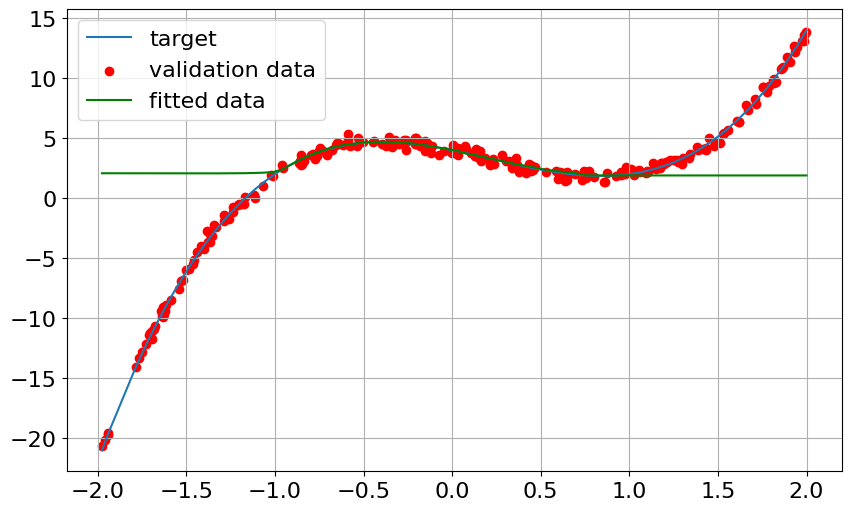

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_valid2, y_valid2, color='r', label='validation data')
plt.plot(x_valid2,model9.predict(x_valid2),color ='g',label = 'fitted data')
plt.legend()
plt.grid(True)
plt.show()

Outside the range of fit the model fails to predict the behaviour of the real function.